In [1]:
import numpy as np
import pandas as pd

In [2]:
file_train = '/Users/shirishpandagare/IndustrialEngineering/ECEN_689/Challenge_5/5challenge_training_shirishpandagare.csv'
file_test = '/Users/shirishpandagare/IndustrialEngineering/ECEN_689/Challenge_5/5challenge_testing_shirishpandagare.csv'

In [3]:
class challenge5:
    def __init__(self, file_path):
        
        self.filepath = file_path
        
    def df(self, file_path):
        import pandas as pd
        df_index = pd.read_csv(file_path)
        df = df_index.drop(df_index.columns[0], axis=1)
        return df
    
    def class_split(self, df, label):
        X = df.drop([label], axis=1)
        y = df.Class
        return X , y
    
    def svm(self,X,y,kernel,gamma):
        from sklearn import svm
        from sklearn.svm import SVC
        clf = svm.SVC(kernel = kernel ,gamma=gamma)
        svm_clf = clf.fit(X, y)
        return svm_clf
    
    def validation(self,Y_true, Y_predict):
        from sklearn.metrics import classification_report, confusion_matrix
        from sklearn.metrics import jaccard_similarity_score
        from sklearn.metrics import f1_score
        
        f1Score = f1_score(Y_true, Y_predict, average=None)
        f1_mean = (f1Score[0] + f1Score[1])/2
        Jaccard_Score = jaccard_similarity_score(Y_true, Y_predict)
        score_dict = {'Jaccard Score': Jaccard_Score,'F1 Measure': f1_mean}
        print(score_dict)
        
    def evaluation(self, X, Y_predict):
        from sklearn import metrics
        from sklearn.metrics import pairwise_distances
        Silhouette = metrics.silhouette_score(X, Y_predict, metric='euclidean')
        pred_score = {'Silhouette Coefficent': Silhouette}
        print(pred_score)
        
    def scatter_graph(self, clf ,train_data):
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set(font_scale=1.5)
        import pickle
        
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set(font_scale=1.5)
        import pickle
        
        # Get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-1.5, 2)
        yy = a * xx - (clf.intercept_[0]) / w[1]
        
        # Plot the parallels to the separating hyperplane that pass through the support vectors
        margin = 1 /np.sqrt(np.sum(clf.coef_**2))
        yy_down = yy - np.sqrt(1+a**2)*margin
        yy_up = yy + np.sqrt(1+a**2)*margin
        
        sns.lmplot('Feature 0', 'Feature 1', data= train_data, hue='Class',palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        sns.lmplot('Feature 0', 'Feature 1', data= train_data, hue='Class', palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        plt.plot(xx, yy, linewidth=2, color='black');
        
        # Look at the margins and support vectors
        sns.lmplot('Feature 0', 'Feature 1', data= train_data, hue='Class', palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        plt.plot(xx, yy, linewidth=2, color='black')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=80, facecolors='none')        
        
    def linear_graph(self, clf, test_data, Ytest_predict ):
        import matplotlib.pyplot as plt
        import seaborn as sns; sns.set(font_scale=1.5)
        import pickle
        
        # Get the separating hyperplane
        w = clf.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(-1.5, 2)
        yy = a * xx - (clf.intercept_[0]) / w[1]
        
        # Plot the parallels to the separating hyperplane that pass through the support vectors
        margin = 1 /np.sqrt(np.sum(clf.coef_**2))
        yy_down = yy - np.sqrt(1+a**2)*margin
        yy_up = yy + np.sqrt(1+a**2)*margin
        
        test_data.Class = Ytest_predict
        
        sns.lmplot('Feature 0', 'Feature 1', data= test_data, hue='Class',palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        sns.lmplot('Feature 0', 'Feature 1', data= test_data, hue='Class', palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        plt.plot(xx, yy, linewidth=2, color='black');
        
        # Look at the margins and support vectors
        sns.lmplot('Feature 0', 'Feature 1', data= test_data, hue='Class', palette='Set1', 
                   fit_reg=False, scatter_kws={"s": 70})
        plt.plot(xx, yy, linewidth=2, color='black')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=80, facecolors='none');


In [4]:
cg = challenge5(file_train)
df_train = cg.df(file_train)
X , y = cg.class_split(df_train, 'Class')

svm_linear = cg.svm(X, y, 'linear', 'auto')
ytrain_linear_pred = svm_linear.predict(X)

svm_poly = cg.svm(X, y, 'poly', 'auto')
ytrain_poly_pred = svm_poly.predict(X)

svm_rbf = cg.svm(X, y, 'rbf', 'auto')
ytrain_rbf_pred = svm_rbf.predict(X)

svm_sigmoid = cg.svm(X, y, 'sigmoid', 'auto')
ytrain_sigmoid_pred = svm_sigmoid.predict(X)

# Performance of each SVM 

In [5]:
## Linear Kernel 
print(cg.validation(y, ytrain_linear_pred))

{'Jaccard Score': 0.77, 'F1 Measure': 0.7666396103896104}
None


In [6]:
## Polynomial Kernel
print(cg.validation(y, ytrain_poly_pred))

{'Jaccard Score': 0.695, 'F1 Measure': 0.6946259167480164}
None


In [7]:
## Radial basis Function Kernel
print(cg.validation(y, ytrain_rbf_pred))

{'Jaccard Score': 0.775, 'F1 Measure': 0.7701677775224087}
None


In [8]:
## Sigmoidal Function Kernel
print(cg.validation(y, ytrain_sigmoid_pred))

{'Jaccard Score': 0.53, 'F1 Measure': 0.529811924769908}
None


# Performance on the test data Using Internal Measure techniques 

In [9]:
df_test = cg.df(file_test)
X_test, y = cg.class_split(df_test, 'Class')
ytest_pred_linear = svm_linear.predict(X_test)
ytest_pred_poly = svm_poly.predict(X_test)
ytest_pred_rbf = svm_rbf.predict(X_test)
ytest_pred_sigmoid = svm_sigmoid.predict(X_test)

In [10]:
## Linear Kernel 
cg.evaluation(X_test, ytest_pred_linear)

{'Silhouette Coefficent': 0.3033030267218699}


In [11]:
## Polynomial Kernel 
cg.evaluation(X_test, ytest_pred_poly)

{'Silhouette Coefficent': 0.2765353848587666}


In [12]:
## Radial Basis Function 
cg.evaluation(X_test, ytest_pred_rbf)

{'Silhouette Coefficent': 0.26990933649472787}


In [13]:
## Sigmoidal Function
cg.evaluation(X_test, ytest_pred_sigmoid)

{'Silhouette Coefficent': 0.1328357276170503}


## SVM Linear Hyperplane on the training dataset

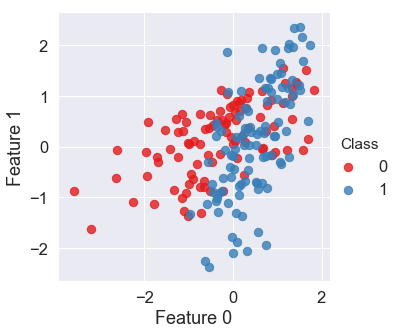

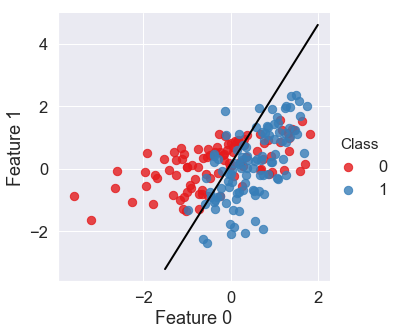

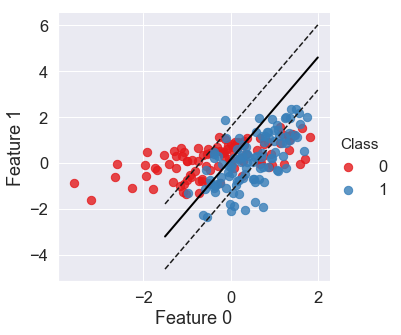

In [16]:
cg.scatter_graph(svm_linear, df_train )

## Linear Hyperplane on the testing Dataset

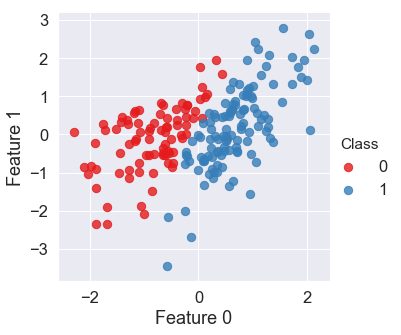

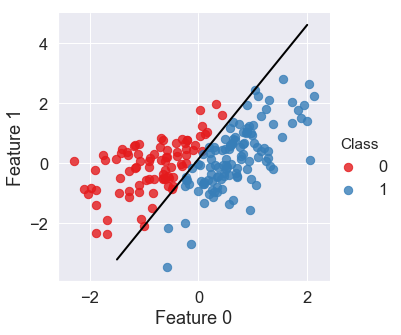

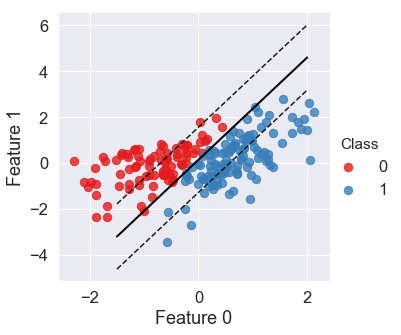

In [15]:
cg.linear_graph(svm_linear, df_test, ytest_pred_linear)